# <center>Lecture 2: Basic Sampling</center>


In our fist lecture we have understood that the building block of all Monte Carlo algorithms are random numbers (more precisely pseudo random numbers) uniformly distibuted in the interval $(0,1)$. We call them $\text{ran}(0,1)$. 

In the future lectures we will see that, thanks to Markov Chain Monte Carlo, $\text{ran}(0,1)$ can be remodeled into random configurations of liquids and solids, ferromagnets and paramagnets or quantum particles paths. 

Here we learn how to reshape $\text{ran}(0,1)$ into various distributions (both discrete and continuos) or into $d$-dimensional vectors on hyperspheres. We can efficiently achieve it with a clever implementation of a Direct Sampling algorithm: the Tower Sampling.


## <center> Discrete distributions </center>

Let's start with the inhmogeneous 3x3 pebble game introduced in Lecture 1.


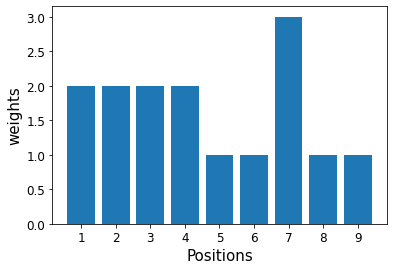

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
weights= [2.,  2., 2., 2.,  1., 1., 3.,  1.,  1.]
plt.bar(range(1,10), weights)
plt.xticks(range(1,10), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('weights', fontsize=15)
plt.xlabel('Positions', fontsize=15)
plt.show()


How to sample the different positions using a Direct Sampling method?

The idea is to pile up the boxes (each one rapresenting a different postion) and form a tower with them. 

**Warning: the floors of the tower have not the same height!** 

Let's see how it works:

1.   Pile up the boxes: $\Pi_1=\pi_1, \Pi_2 =  \pi_1+\pi_2, \ldots$. Note that  $\Pi_k$ is the (non normalized) cumulative distribution of $\pi_k$.

2.  Draw a random number $\Upsilon \in (0,\Pi_{\text{sum}})$. Here $\Pi_{\text{sum}}= \sum_{i} \pi_i$ is the total height of the tower.

3.  Find out the $\Upsilon$'s floor. (which is quite tricky) 


In [ ]:

# bisection finds the floor in the tower Pi_cum corresponding to eta
def bisection(Upsilon, Pi_cum):
    kmin = 0
    kmax = len(Pi_cum)
    while True:
        k = int((kmin + kmax) / 2)
        if Pi_cum[k] < Upsilon:
            kmin = k
        elif Pi_cum[k - 1] > Upsilon:
            kmax = k
        else:
            return k 


In [ ]:
sum_w = np.sum(weights)
Pi_cum=[0]
for l in range(len(weights)):
   Pi_cum.append(Pi_cum[l] + weights[l])
all_pos = []
N_trials = 100
for sample in range(N_trials):
    Upsilon = random.uniform(0,1) * sum_w
    pos = bisection(Upsilon, Pi_cum)
    all_pos.append(pos)
heights = np.bincount(np.array(all_pos), minlength=10)
heights = heights[1:] #we discard the '0' that bincount creates
heights = sum_w*heights/np.sum(heights)
plt.bar(range(1,10), heights, alpha=0.9)
plt.plot(range(1,10), weights, c='orangered', marker='o') 
plt.xticks(range(1,10), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Tower Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Positions', fontsize=15)
plt.show()

## <center> Continuous distributions </center>

We can extend the discrete Tower Sampling to continuous distributions. It is useful to "discretize" the continuous distribution into hystograms, i.e. many boxes. For the continuum limit we change:
* discrete indexes in continuos varialbles:
$$ \{k, \pi_k\} \quad \to \quad \{x,\pi(x)\}$$

* Sums turn into integrals:
$$\Pi_k= \Pi_{k-1} + \pi_k \quad \to \quad \Pi(x) = \Pi(x -dx) +\pi(x) dx=\int_{-\infty}^x \pi(x) dx $$
We will work with normalized $\pi(x)$ so that $\Upsilon$ is a $\text{ran}(0,1)$.

* The condition
$$ \text{Find} \; k \; \text{such that} \; \Pi_{k-1} < \Upsilon < \Pi_{k}$$
becomes 
$$ \text{Find} \; x \; \text{such that} \; \Pi(x) = \Upsilon$$
 Let $\Pi^{-1}$ be the inverse function of $\Pi$. Then the  random number
$$ x=\Pi^{-1}(\Upsilon)$$
is distributed as $\pi(x)$. The tricky step is usually to find $\Pi^{-1}$.

### Example:
Let's try with the Pareto distribution for $\alpha>0$:
$$ \pi(x) =
\begin{cases}  \frac{\alpha }{x^{\alpha+1}} \quad &\text{for}\; x\ge1 \\
\\
0 \quad  &\text{for}\; x< 1
\end{cases}$$
* First: compute the cumulative distribution:
 $$\Pi(x)=1- 1/x^\alpha$$

* Second: from $ x = \Pi(\Upsilon)$ you get Then one can write:
$$x = \Pi^{-1}(\Upsilon)=(1-\Upsilon)^{-1/\alpha}$$

* Third: by noting that both $\Upsilon$ and $1-\Upsilon$ are $\text{ran}(0,1)$, you get:

$$ x  = \left[\text{ran}(0,1)\right]^{-1/\alpha}$$

### Exercises:

1.   Draw random numbers from $\pi(x) d x=  \lambda e^{-\lambda x} d x$

2.   Check the program 1 below and find $\pi(x)$

3.   Check the program 2 below and find $\pi(x)$ **(challenge)**



In [ ]:
# Program 1
import math
N_trials = 10000
all_pos = []
for sample in range(N_trials):
    x = math.sin(random.uniform(-1,1)*math.pi/2)
    all_pos.append(x)
n, bins, patches = plt.hist(all_pos, 200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Tower Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.show()    


In [ ]:
#Program 2
import math
N_trials = 10000
all_pos = []
for sample in range(N_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    sum = math.sqrt(x ** 2 + y ** 2)
    if sum < 1.0:
       all_pos.append(y / sum)
n, bins, patches = plt.hist(all_pos, 200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Tower Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.show()    

## Sampling Gaussian numbers

In many applications, we need Gaussian random numbers $\xi$ distributed
with a probability

$$\pi(\xi) = \frac{1}{\sqrt{2 \pi \sigma}} \exp\left(  -\frac{(\xi - \mu)^2}{2 \sigma^2} \right) $$

Here $\mu$ is the mean and $\sigma$ is the standard deviation. Using the transformation $x= (\xi-\mu)/\sigma$ one recovers the normal distribution:

$$\pi(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(  -x^2/2\right) $$

In practice if we are able to draw normal numbers, we can draw any kind of Gaussian numbers:
$$ \xi = \sigma x + \mu$$
Unfortunately the cumulative distribution in this case, $\Pi(x)= \frac12(1+\text{erf}(x))$, cannot be explicitly inverted.  Hopefully we can use a  multidimensional tower sampling and draw two Gaussian random numbers very efficiently. 

Consider two independents normal numbers, $x$ and $y$. Their joint probability is

$$\pi(x,y) dx dy =\pi(x) \pi(y) dx dy = \frac{1}{2 \pi} \exp\left(  -\frac{(x^2 +y^2)}{2}\right) dx dy$$

* We introduce the standard change of variables:
$$
x= r \cos(\phi)\\
y= r \sin(\phi)\\
d x dy = r d r d \phi
$$

* The joint probability becomes
$$ \pi(x,y) dx dy = \frac{d \phi}{2 \pi}  r \exp(- \frac{r^2}{2}) d r $$
Note that $r$ and $\phi$ are still independent random numbers. If we draw them we can draw $x$ and $y$. In order to draw $r$ with tower sampling we need and extra change of variable: $t=r^2/2$, so that we have
$$ \pi(x,y) dx dy  = \frac{d \phi}{2 \pi} \exp(-t) d t$$

* The random variables $\phi$ and $t$ are easy to sample:
$$  \phi= 2 \pi \, \text{ran}(0,1) \, , \quad
t=-\ln [\text{ran}(0,1)]$$
By generating two random numbers $\Upsilon_1 = \text{ran}(0,1)$ and $\Upsilon_2 = \text{ran}(0,1)$ we have then two normal numbers

$$ x= \sqrt{-2 \ln(\Upsilon_1)} \cos( 2 \pi \Upsilon_2)\\
y= \sqrt{-2 \ln(\Upsilon_1)} \sin( 2 \pi \Upsilon_2)
$$

Using the same trick of Program 2, you can avoid to determine explicitly trigonometric functions. The latter variant is called Box-Muller algorithm. 

In [ ]:
# Box-Muller
import math
N_trials = 1000000
all_pos = []
for sample in range(N_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    sum = math.sqrt(x ** 2 + y ** 2)
    if sum < 1.0:
       r = math.sqrt(-2*math.log(random.uniform(0,1)))
       all_pos.append(r * y / sum)
n, bins, patches = plt.hist(all_pos, 200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Tower Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.show()    

## <center> Sampling random points on a circle </center>

Our goal is to evenly sample points on a circle of unit radius. The simplest strategy is to draw a random angle in the interval $(0,2 \pi)$. This is a correct strategy, but 
* it requires the knowledge of the number $\pi$
* it is very difficult to generalize in higher dimensions. There the circle in replaced by an hypersphere.  

A promising strategy is to draw random numbers on a portion of the plane and project them on the unit circle:
$$(x,y) \to \left( \frac{x}{\sqrt{x^2+y^2}} , \frac{y}{\sqrt{x^2+y^2}}\right); \quad \phi=\text{atan}\left(\frac{x}{y}\right)$$

The simplest way to do something of very wrong is to draw points in the square inscribing the unit circle The correct way is to reject all points outside the circle, and accept the ones inside.

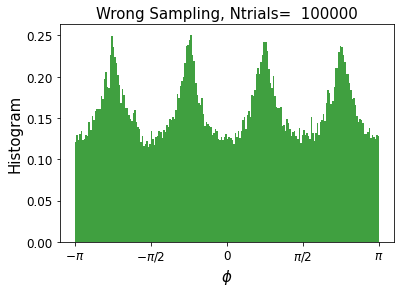

In [3]:
# Wrong Sampling program in 2D
import math
N_trials = 100000
phi_pos = []
for sample in range(N_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    phi_pos.append(math.atan2(x, y))
n, bins, patches = plt.hist(phi_pos, 200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(np.arange(-3.141, 3.141, step=1.57),('$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'),  fontsize=12)
plt.yticks(fontsize=12)
plt.title('Wrong Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('$\phi$', fontsize=15)
plt.show()    


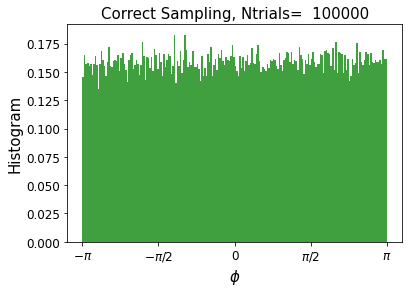

In [4]:
# correct Sampling program
import math
N_trials = 100000
phi_pos = []
for sample in range(N_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    sum = math.sqrt(x ** 2 + y ** 2)
    if sum < 1.0:
       phi_pos.append(math.atan2(x, y))
n, bins, patches = plt.hist(phi_pos, 200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(np.arange(-3.141, 3.141, step=1.57),('$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'),  fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correct Sampling, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('$\phi$', fontsize=15)
plt.show()    

## <center> Maxwell Distribution of the velocities </center>

The Maxwell distribution for ideal gases at equilibrium 
$$P(v) d v = \sqrt{\frac{2}{\pi}} \frac{v^2}{a^3} \exp(-\frac{v^2}{2 a^2}) dv$$
is the probability density function for the particle speed $v=\sqrt{v_x^2+v_y^2+v_z^2}$. The scale parameter $a$ can be related to the total energy of the $N$ particles:
$$ a= \sqrt{\frac{2 E_{\text{kin}} }{ 3 N m} }$$ 

For simplicity set $a=1$ and unit $m=1$. The total energy is $E_{\text{kin}}=\frac{3}{2} N$ from which we have:

$$ v_{x, 1}^2 + v_{y, 1}^2+ v_{z, 1}^2+ v_{x, 2}^2 +\ldots = 3 N $$ 

The population is then the surface of an hypersphere of radius $r=\sqrt{3 N}$. An example is a point on this hypersphere, namely a $3N$ dimensional vector with the velocities components of the $N$ particles of the gas. ** Boltzman equipartition requires that all allowed points have equal weight. **

How to draw unbiased examples from this population? 

* We can be wrong again: draw random points on the hypercube where the hypersphere is inscribed and then project them on the allowed surface. 


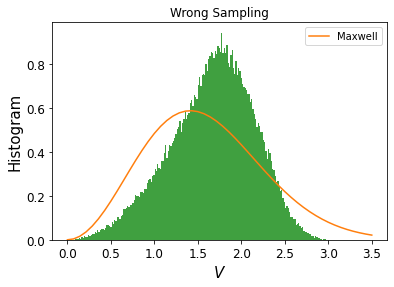

In [5]:
# Wrong Sampling program in 3 N D
import math
N=100
N_trials = 1000
all_v = []
r=math.sqrt(3*N)
for sample in range(N_trials):
    V_cube=np.random.uniform(-r, r, 3*N )
    norm2=np.linalg.norm(V_cube, ord=2)/r 
    V_sphere_a=V_cube/norm2
    V_sphere = V_sphere_a.tolist()
    while V_sphere != []:
          x=V_sphere.pop()
          y=V_sphere.pop()
          z=V_sphere.pop()
          v=math.sqrt(x ** 2 + y ** 2 + z ** 2)
          all_v.append(v)
n, bins, patches = plt.hist(all_v, 200, density=True, facecolor='g', alpha=0.75)    
p_maxwell = lambda v: (v**2)*np.exp(-0.5*v**2)*np.sqrt(2/np.pi)
v_plot = np.linspace(0, 3.5)
plt.plot(v_plot, p_maxwell(v_plot), label='Maxwell')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Wrong Sampling')
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('$V$', fontsize=15)
plt.legend()
plt.show()    

* we can use the same strategy used in 2D: reject all the points outside the hypersphere and project only the one inside. This is correct but we should evaluated the acceptance ratio. In 2D it is not bad
$$p_{\text{acc}}^{2D} =\frac{\pi}{4} \simeq 0.785$$
In 3D is still OK
$$p_{\text{acc}}^{3D} =\frac{4 \pi}{3}\frac18 =\frac{\pi}{6} \simeq 0.524$$
In 4D it does not improve, but still OK:
$$p_{\text{acc}}^{4D} =\frac{\pi^2}{2}\frac{1}{16} =\frac{\pi^2}{32} \simeq 0.308$$
Let's move further and consider $N=4$ particles, namely $12D$, the volume of a d-dimensional hypersphere of unit radius is $V_d= \pi^{d/2}/\Gamma(1+d/2)$, from this we have
$$ p_{\text{acc}}^{12D} =\frac{\pi^6}{6!}\frac{1}{2^{12}}\simeq 0.000326 $$
which is definitely too small. This strategy is totally inefficient in high dimensions!

* The key idea of previous strategy is to sample points with a distribution rotationally invariant and project them on the hypersphere. To draw points at random inside the hypersphere is correct but difficult. Let's think about independent gaussian numbers
$$ \pi(\vec{x}) d x_1 \ldots d x_N = \frac{1}{(2\pi)^{d/2}} \exp\left(-\frac{1}{2} \sum_{i=1}^N x_i^2\right) d x_1 \ldots d x_N \\= \frac{1}{(2\pi)^{d/2}} exp\left(-\frac{1}{2} r^2\right) r^{d-1} dr d\Omega $$
the radial part and the angular part factorize, so they are rotationally invariant. And the method is rejection free!!

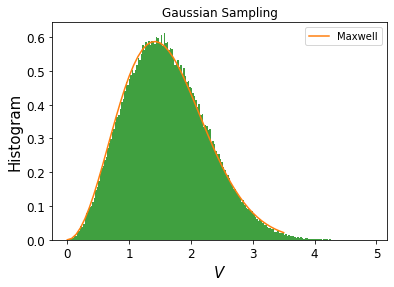

In [6]:
# Sampling program in 3 N D
import math
N=20
N_trials = 10000
all_v = []
r=math.sqrt(3*N)
for sample in range(N_trials):
    V_cube=np.random.normal(0, r, 3*N )
    norm2=np.linalg.norm(V_cube, ord=2)/r 
    V_sphere_a=V_cube/norm2
    V_sphere = V_sphere_a.tolist()
    while V_sphere != []:
          x=V_sphere.pop()
          y=V_sphere.pop()
          z=V_sphere.pop()
          v=math.sqrt(x ** 2 + y ** 2 + z ** 2)
          all_v.append(v)
n, bins, patches = plt.hist(all_v, 200, density=True, facecolor='g', alpha=0.75)    
p_maxwell = lambda v: (v**2)*np.exp(-0.5*v**2)*np.sqrt(2/np.pi)
v_plot = np.linspace(0, 3.5)
plt.plot(v_plot, p_maxwell(v_plot), label='Maxwell')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Gaussian Sampling')
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('$V$', fontsize=15)
plt.legend()
plt.show()    